<a href="https://colab.research.google.com/github/Uyen02122003/Python-2/blob/main/MIS710_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **1.2 Mount Google drive**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **1.3 Load and inspect data**


In [ ]:
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment 1/PQC_data.csv")

print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

       Game_ID                                          Game_Name  \
0         9048                                    Age of Industry   
1        40086                                 Going The Distance   
2        12545                                             Inside   
3        62639                                        New Bedford   
4        26419                            Sekigahara fierce fight   
...        ...                                                ...   
24808    47621                                      Mutterbhnchen   
24809    52815                           Mercadores de Dur Durany   
24810    11697  The Lord of the Rings: The Return of the King ...   
24811    40892                                        Sea Command   
24812    30243                                               B.S.   

       Released_Year    Game_Type    Age_Category  Min_Players  Max_Players  \
0               2010     BaseGame  12 to under 18            2            5   
1            

In [ ]:
records = records.drop(['Game_ID'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_Name            24806 non-null  object 
 1   Released_Year        24813 non-null  int64  
 2   Game_Type            24813 non-null  object 
 3   Age_Category         24813 non-null  object 
 4   Min_Players          24813 non-null  int64  
 5   Max_Players          24813 non-null  int64  
 6   Average_Complexity   24813 non-null  float64
 7   Complexity_Raters    24813 non-null  int64  
 8   Average_Play_Time    24813 non-null  int64  
 9   Owner_Number         24813 non-null  int64  
 10  Trader_Number        24813 non-null  int64  
 11  HighInterest_Number  24813 non-null  int64  
 12  Interest_Number      24813 non-null  int64  
 13  Rater_Number         24813 non-null  int64  
 14  Comment_Number       24813 non-null  int64  
 15  Average_Rating       24813 non-null 

In [ ]:
records = records.drop(['Game_Name'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released_Year        24813 non-null  int64  
 1   Game_Type            24813 non-null  object 
 2   Age_Category         24813 non-null  object 
 3   Min_Players          24813 non-null  int64  
 4   Max_Players          24813 non-null  int64  
 5   Average_Complexity   24813 non-null  float64
 6   Complexity_Raters    24813 non-null  int64  
 7   Average_Play_Time    24813 non-null  int64  
 8   Owner_Number         24813 non-null  int64  
 9   Trader_Number        24813 non-null  int64  
 10  HighInterest_Number  24813 non-null  int64  
 11  Interest_Number      24813 non-null  int64  
 12  Rater_Number         24813 non-null  int64  
 13  Comment_Number       24813 non-null  int64  
 14  Average_Rating       24813 non-null  float64
dtypes: float64(2), int64(11), object(2)


In [ ]:
cleaned_data = records[records['Released_Year'] != -99]

In [ ]:
print("\n*** Dataset shape: ", records.shape)


*** Dataset shape:  (24813, 15)


## **1.4 Inspect missing data**

In [ ]:
#Count missing data
for i in records.iloc[:,0:]:
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)

Released_Year missing:  0
Game_Type missing:  0
Age_Category missing:  0
Min_Players missing:  0
Max_Players missing:  0
Average_Complexity missing:  0
Complexity_Raters missing:  0
Average_Play_Time missing:  0
Owner_Number missing:  0
Trader_Number missing:  0
HighInterest_Number missing:  0
Interest_Number missing:  0
Rater_Number missing:  0
Comment_Number missing:  0
Average_Rating missing:  0


In [ ]:
for col in records.columns:
    if records[col].dtype == 'object':
        records[col].fillna(records[col].mode()[0], inplace=True)
    else:
        records[col].fillna(records[col].mean(), inplace=True)

## **1.5 Conduct Exploratory Data Analysis (EDA)**

**Summarise and visualise data**
1.  Univariate analysis
2.  Bivariate analysis
3.  Multivariate analysis


### **1.5.1 Univariate analysis**
Explore and visualise each variable at a time

**Explore numeric variables**

In [ ]:
#overview of numeric data
records.describe()

,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813,24813,24813,24813,24813,24813,24813,24813,24813,24813,24813,24813,24813
mean,1997,2,5,2,43,55,674,23,32,111,427,126,6
std,126,1,7,1,190,43,2454,61,96,379,1881,458,2
min,-99,0,0,1,1,1,0,0,0,0,0,0,0
25%,2000,2,4,1,1,25,17,0,0,2,7,4,6
50%,2007,2,4,2,4,45,77,3,3,9,27,13,6
75%,2012,2,6,2,16,60,376,17,18,49,142,57,7
max,2017,9,99,5,5996,180,73188,1395,1586,6402,53680,11798,10


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.000,24813,24813,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000
unique,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BaseGame,5 to under 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20796,12335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1997.201,NaN,NaN,2.062,5.321,1.986,42.554,55.214,674.204,23.187,32.461,111.183,426.814,125.987,6.215
std,126.088,NaN,NaN,0.674,7.077,0.826,190.106,42.588,2453.510,61.474,95.827,378.753,1881.193,457.627,1.512
min,-99.000,NaN,NaN,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2000.000,NaN,NaN,2.000,4.000,1.231,1.000,25.000,17.000,0.000,0.000,2.000,7.000,4.000,5.556
50%,2007.000,NaN,NaN,2.000,4.000,2.000,4.000,45.000,77.000,3.000,3.000,9.000,27.000,13.000,6.428
75%,2012.000,NaN,NaN,2.000,6.000,2.500,16.000,60.000,376.000,17.000,18.000,49.000,142.000,57.000,7.147


In [ ]:
cleaned_data = records[records['Released_Year'] != -99]

#descibe numeric variable
records['Released_Year'].describe()

,Released_Year
count,24813.000
mean,1997.201
std,126.088
min,-99.000
25%,2000.000
50%,2007.000
75%,2012.000
max,2017.000


In [ ]:
print(records['Released_Year'].mode()[0])

2014


In [ ]:
games_2014_count = cleaned_data[cleaned_data['Released_Year'] == 2014].shape[0]

print(f"Number of games released in 2014: {games_2014_count}")

Number of games released in 2014: 1941


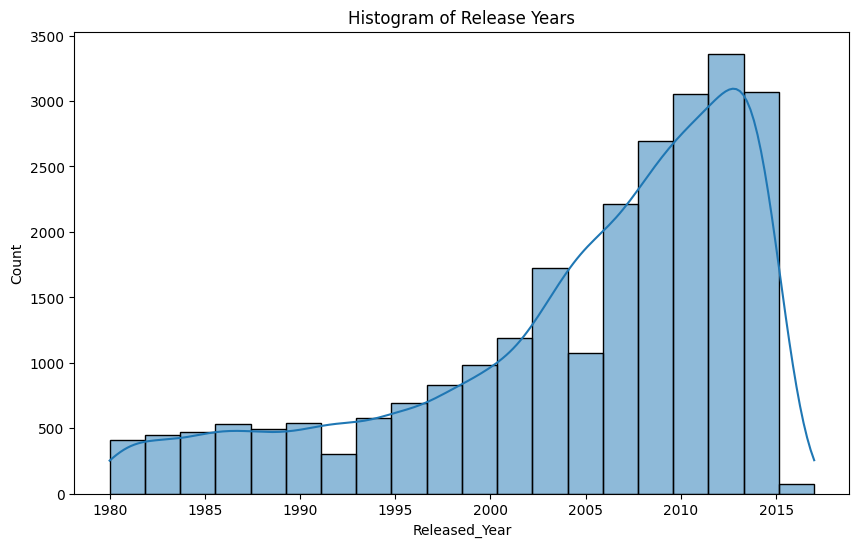

In [ ]:
cleaned_data = records[records['Released_Year'] != -99]

# Visualize the histogram of Release Years after dropping -99 values
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data, x='Released_Year', bins=20, kde=True)
plt.title('Histogram of Release Years')
plt.show()

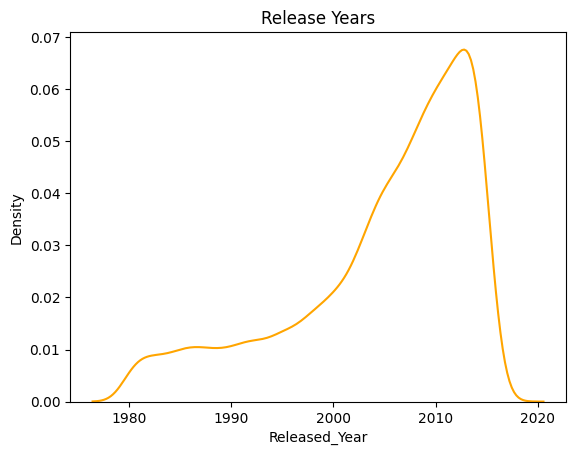

In [ ]:
cleaned_data = records[records['Released_Year'] != -99]

sns.kdeplot(data=cleaned_data, x='Released_Year', color='orange')
plt.title('Release Years')
plt.show()

In [ ]:
records['Min_Players'].describe()

,Min_Players
count,24813.000
mean,2.062
std,0.674
min,0.000
25%,2.000
50%,2.000
75%,2.000
max,9.000


Text(0.5, 0, 'Min_Players')

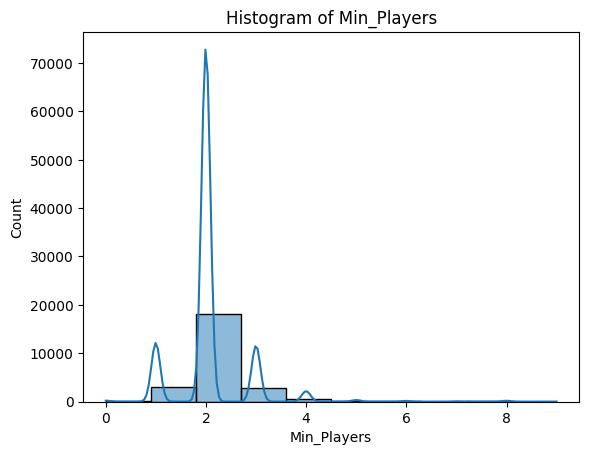

In [ ]:
num_bins = int(max(records['Min_Players']) - min(records['Min_Players']) + 1)
sns.histplot(data=records, x='Min_Players', kde=True, bins=num_bins)
plt.title('Histogram of Min_Players')
plt.xlabel('Min_Players')

In [ ]:
records['Max_Players'].describe()

,Max_Players
count,24813.000
mean,5.321
std,7.077
min,0.000
25%,4.000
50%,4.000
75%,6.000
max,99.000


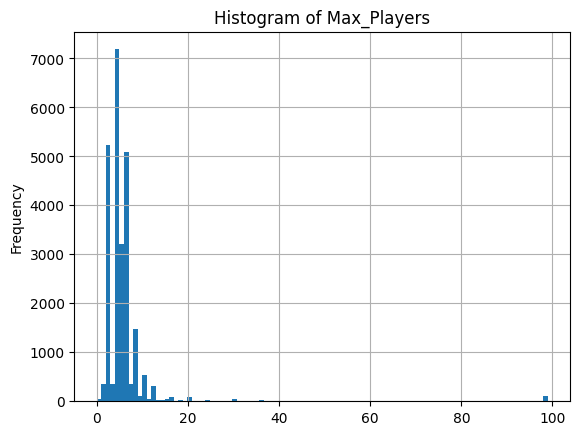

In [ ]:
num_bins = int(max(records['Max_Players']) - min(records['Max_Players']) + 1)
records['Max_Players'].plot.hist(grid=True, bins=num_bins, rwidth=2)
plt.title('Histogram of Max_Players')
plt.show()

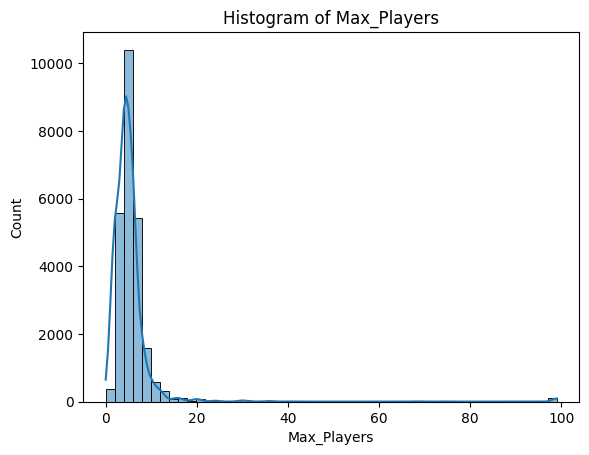

In [ ]:
sns.histplot(data=records, x='Max_Players', kde=True, bins=50)
plt.title(f"Histogram of Max_Players")
plt.show()

In [ ]:
#summerise the Average_Complexity variable
records['Average_Complexity'].describe()

,Average_Complexity
count,24813.000
mean,1.986
std,0.826
min,1.000
25%,1.231
50%,2.000
75%,2.500
max,5.000


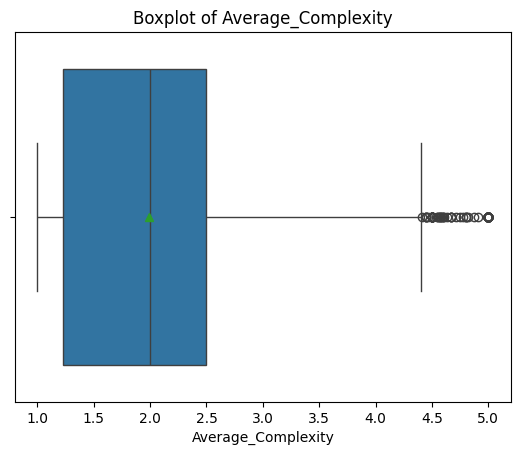

In [ ]:
sns.boxplot(data=records, x='Average_Complexity', showmeans=True)
plt.title(f"Boxplot of Average_Complexity")
plt.show()

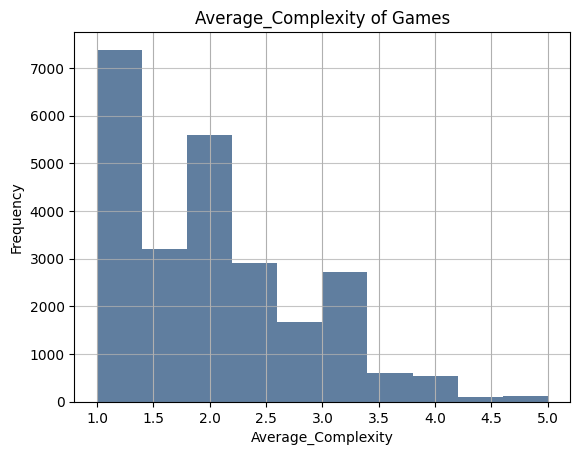

In [ ]:
records['Average_Complexity'].plot.hist(grid=True, bins=10, rwidth=2, color='#607e9f')
plt.title('Average_Complexity of Games')
plt.xlabel('Average_Complexity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [ ]:
records['Complexity_Raters'].describe()

,Complexity_Raters
count,24813.000
mean,42.554
std,190.106
min,1.000
25%,1.000
50%,4.000
75%,16.000
max,5996.000


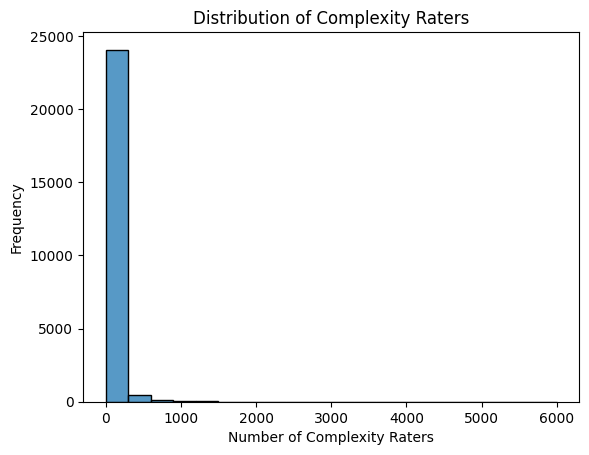

In [ ]:
sns.histplot(data=records, x='Complexity_Raters', bins=20)
plt.title('Distribution of Complexity Raters')
plt.xlabel('Number of Complexity Raters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
records['Average_Play_Time'].describe()

,Average_Play_Time
count,24813.000
mean,55.214
std,42.588
min,1.000
25%,25.000
50%,45.000
75%,60.000
max,180.000


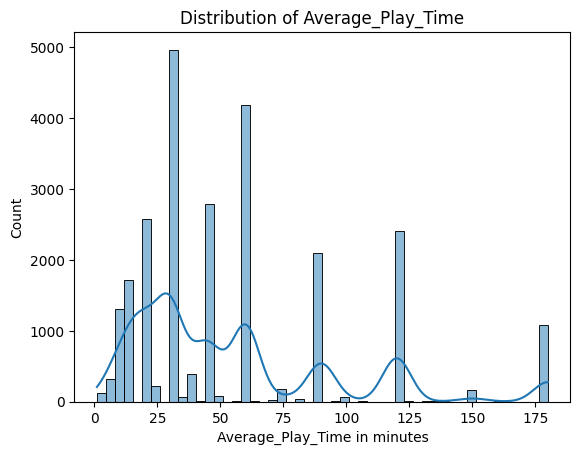

In [ ]:
import seaborn as sns
sns.histplot(data=records, x='Average_Play_Time', bins=50, kde=True)
plt.title('Distribution of Average_Play_Time')
plt.xlabel('Average_Play_Time in minutes')
plt.show()

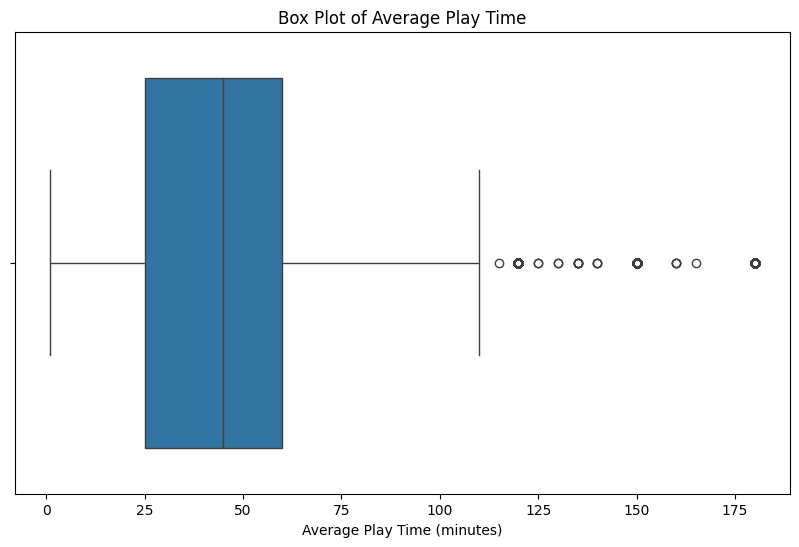

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=records['Average_Play_Time'])
plt.title('Box Plot of Average Play Time')
plt.xlabel('Average Play Time (minutes)')
plt.show()

In [ ]:
records['Owner_Number'].describe()

,Owner_Number
count,24813.000
mean,674.204
std,2453.510
min,0.000
25%,17.000
50%,77.000
75%,376.000
max,73188.000


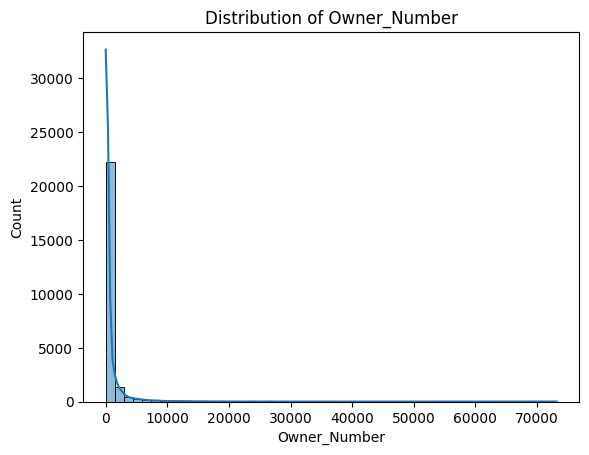

In [ ]:
import seaborn as sns
sns.histplot(data=records, x='Owner_Number', bins=50, kde=True)
plt.title('Distribution of Owner_Number')
plt.xlabel('Owner_Number')
plt.show()

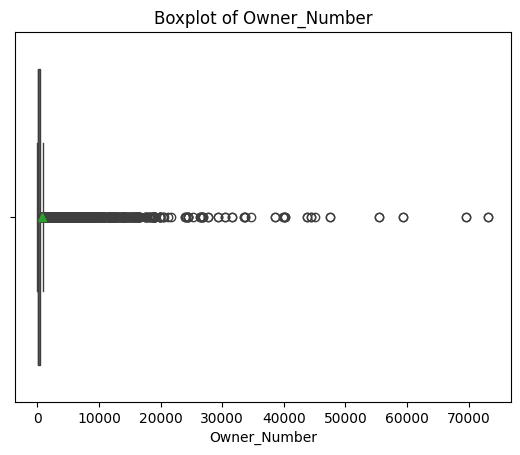

In [ ]:
sns.boxplot(data=records, x='Owner_Number', showmeans=True)
plt.title(f"Boxplot of Owner_Number")
plt.show()

In [ ]:
records['Trader_Number'].describe()

,Trader_Number
count,24813.000
mean,23.187
std,61.474
min,0.000
25%,0.000
50%,3.000
75%,17.000
max,1395.000


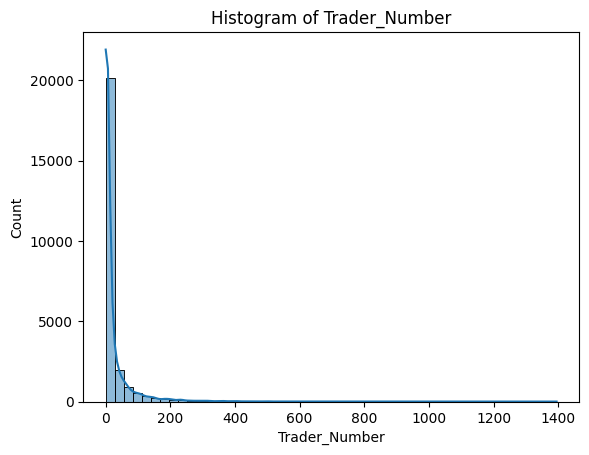

In [ ]:
import seaborn as sns
sns.histplot(data=records, x='Trader_Number', bins=50, kde=True)
plt.title('Histogram of Trader_Number')
plt.xlabel('Trader_Number')
plt.show()

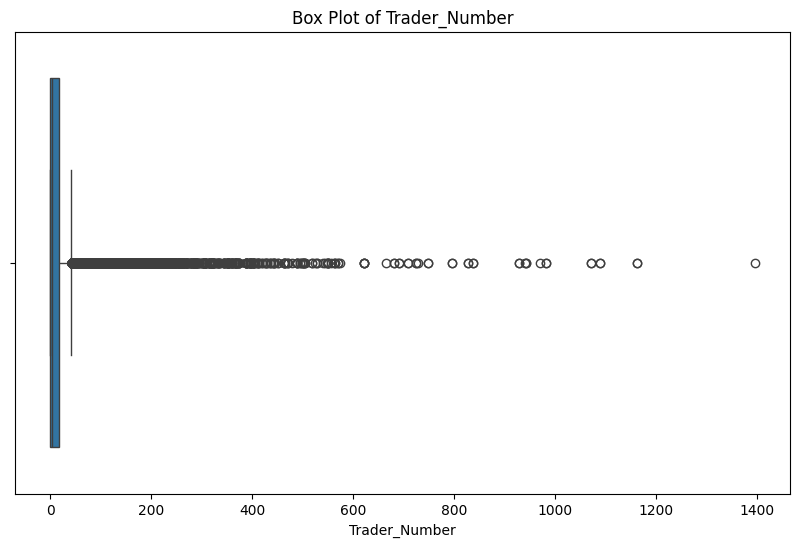

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=records['Trader_Number'])
plt.title('Box Plot of Trader_Number')
plt.xlabel('Trader_Number')
plt.show()

In [ ]:
records['HighInterest_Number'].describe()

,HighInterest_Number
count,24813.000
mean,32.461
std,95.827
min,0.000
25%,0.000
50%,3.000
75%,18.000
max,1586.000


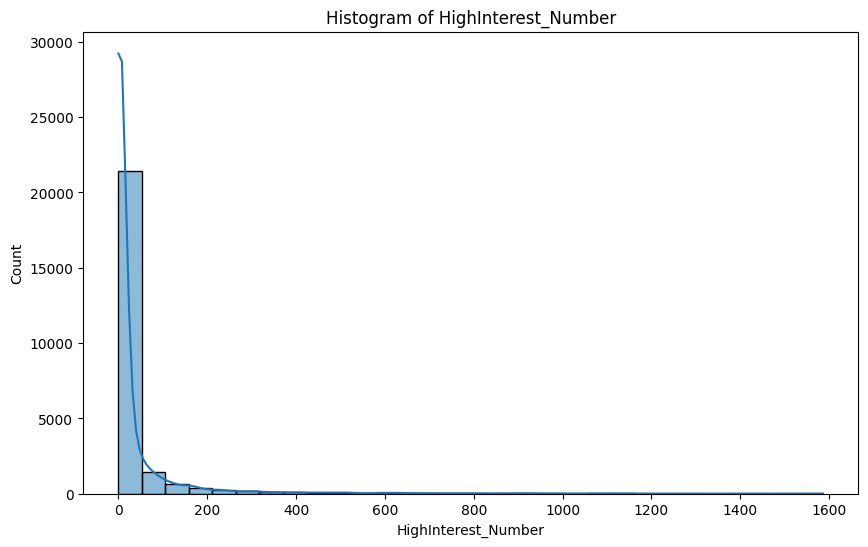

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=records, x='HighInterest_Number', bins=30, kde=True)
plt.title('Histogram of HighInterest_Number')
plt.xlabel('HighInterest_Number')
plt.show()

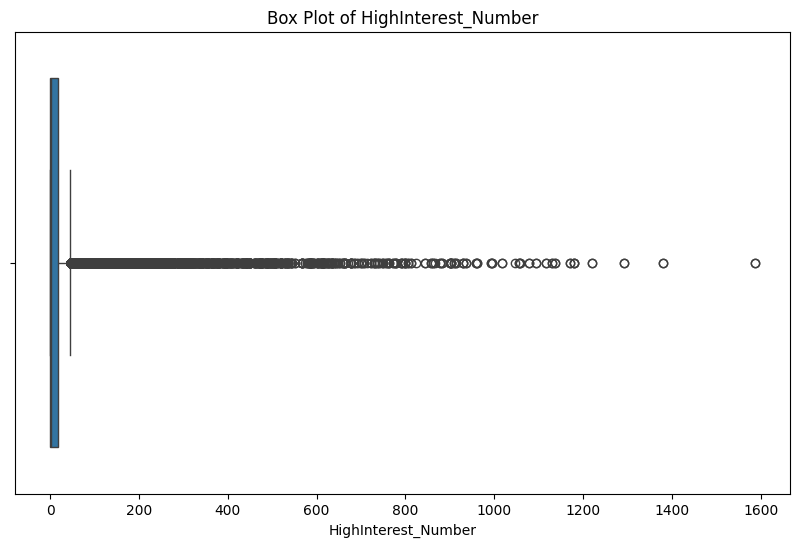

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=records['HighInterest_Number'])
plt.title('Box Plot of HighInterest_Number')
plt.xlabel('HighInterest_Number')
plt.show()

In [ ]:
records['Interest_Number'].describe()

,Interest_Number
count,24813.000
mean,111.183
std,378.753
min,0.000
25%,2.000
50%,9.000
75%,49.000
max,6402.000


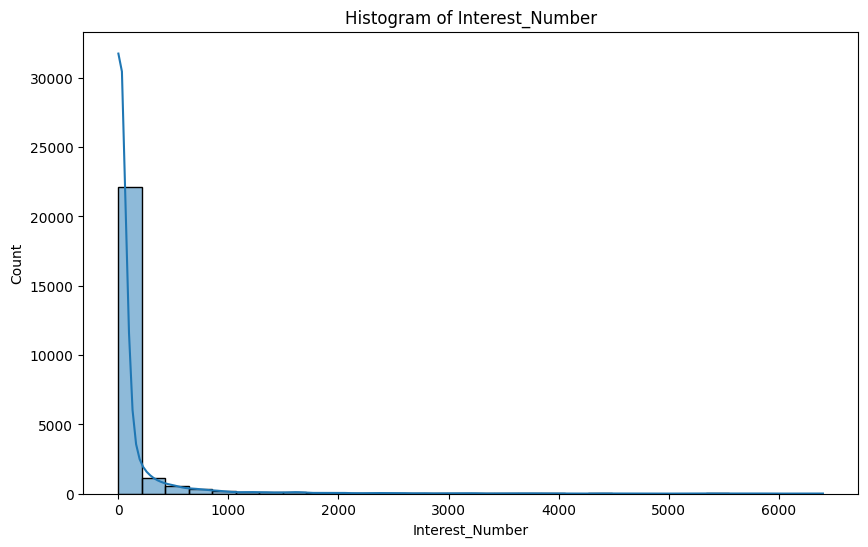

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=records, x='Interest_Number', bins=30, kde=True)
plt.title('Histogram of Interest_Number')
plt.xlabel('Interest_Number')
plt.show()

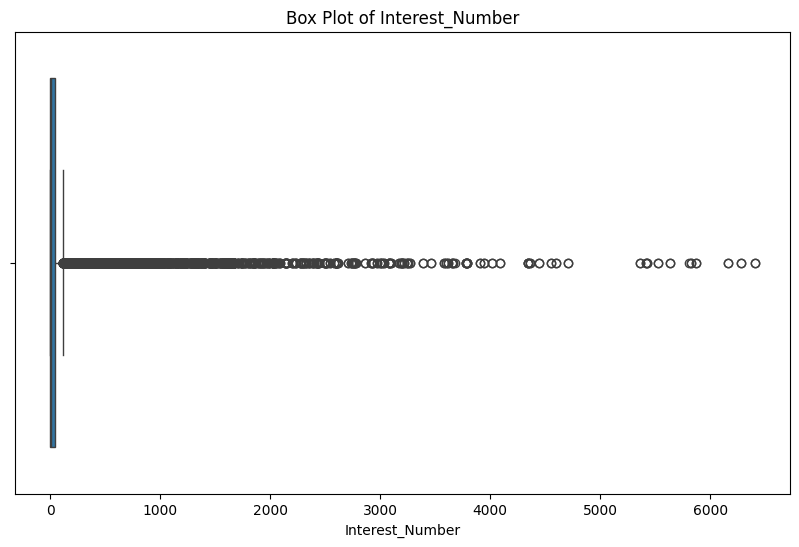

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=records['Interest_Number'])
plt.title('Box Plot of Interest_Number')
plt.xlabel('Interest_Number')
plt.show()

In [ ]:
records['Rater_Number'].describe()

,Rater_Number
count,24813.000
mean,426.814
std,1881.193
min,0.000
25%,7.000
50%,27.000
75%,142.000
max,53680.000


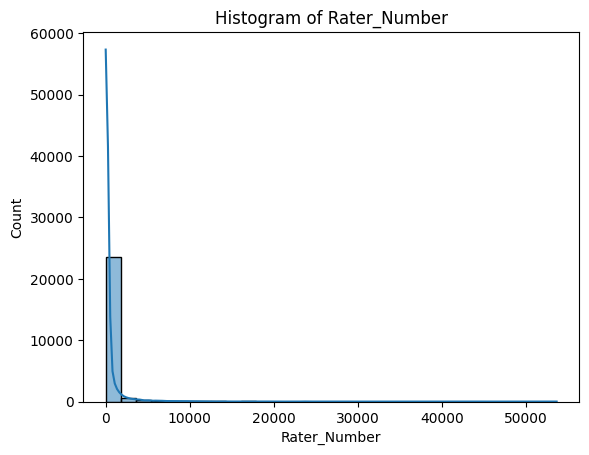

In [ ]:
sns.histplot(data=records, x='Rater_Number', bins=30, kde=True)
plt.title('Histogram of Rater_Number')
plt.xlabel('Rater_Number')
plt.show()

In [ ]:
records['Comment_Number'].describe()

,Comment_Number
count,24813.000
mean,125.987
std,457.627
min,0.000
25%,4.000
50%,13.000
75%,57.000
max,11798.000


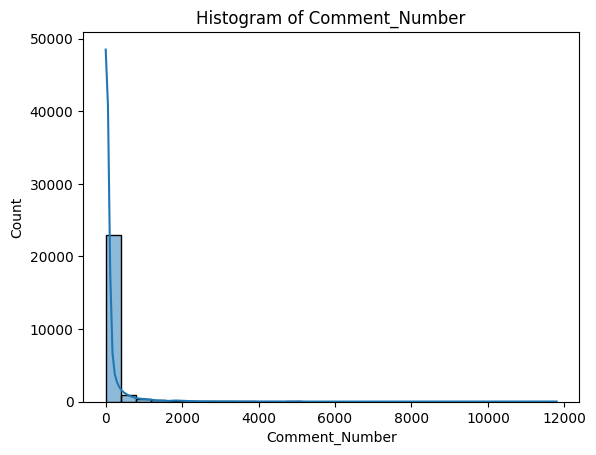

In [ ]:
sns.histplot(data=records, x='Comment_Number', bins=30, kde=True)
plt.title('Histogram of Comment_Number')
plt.xlabel('Comment_Number')
plt.show()

In [ ]:
records['Average_Rating'].describe()

,Average_Rating
count,24813.000
mean,6.215
std,1.512
min,0.000
25%,5.556
50%,6.428
75%,7.147
max,10.000


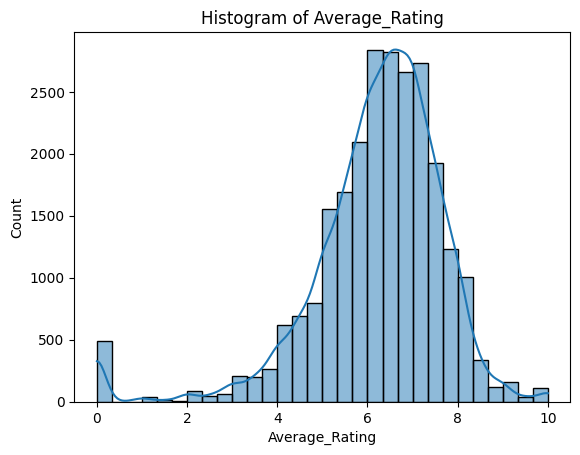

In [ ]:
sns.histplot(data=records, x='Average_Rating', bins=30, kde=True)
plt.title('Histogram of Average_Rating')
plt.xlabel('Average_Rating')
plt.show()

**Explore categorical variables**

In [ ]:
#Explore the categorical variable

print(records['Game_Type'].value_counts())

Game_Type
BaseGame       20796
PremiumGame     4017
Name: count, dtype: int64


In [ ]:
print('Game_Type mode: ', records['Game_Type'].mode())

Game_Type mode:  0    BaseGame
Name: Game_Type, dtype: object


In [ ]:
print(records['Game_Type'].mode()[0])

BaseGame


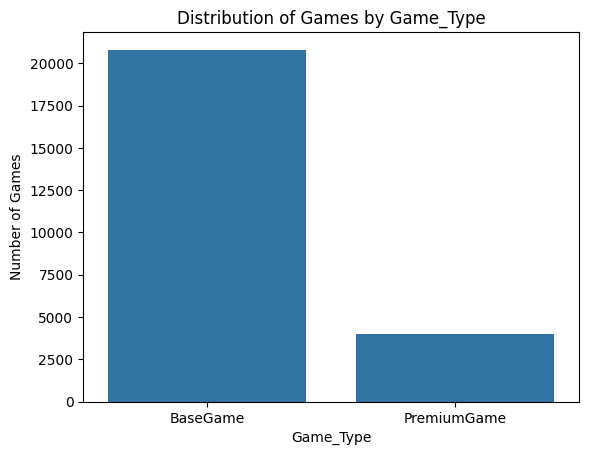

In [ ]:
sns.countplot(data=records, x='Game_Type')
plt.xlabel('Game_Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Game_Type')
plt.show()

In [ ]:
print(records['Age_Category'].value_counts())

Age_Category
5 to under 12     12335
12 to under 18     8520
under 5            3751
18 to under 21      183
21 and over          24
Name: count, dtype: int64


In [ ]:
print('Age_Category mode: ', records['Age_Category'].mode())

Age_Category mode:  0    5 to under 12
Name: Age_Category, dtype: object


In [ ]:
print(records['Age_Category'].mode()[0])

5 to under 12


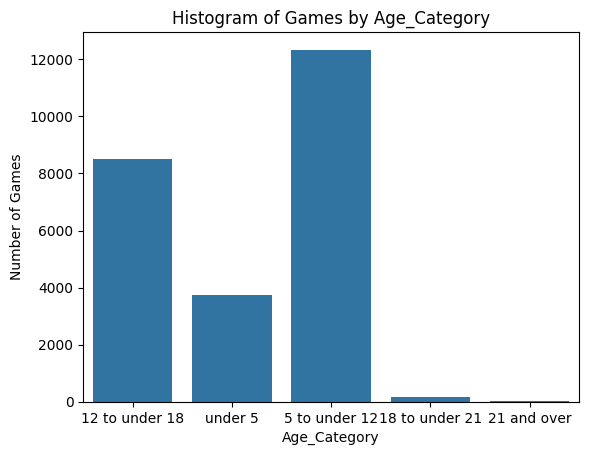

In [ ]:
sns.countplot(data=records, x='Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Number of Games')
plt.title('Histogram of Games by Age_Category')
plt.show()

### **1.5.2 Treat missing data**

### **1.5.3 Encoding data**

In [ ]:
#convert categorical variables to numeric

GameType_mapping = {
   'PremiumGame': 1,
   'BaseGame': 0
}
records['GameType_N'] = records['Game_Type'].replace(GameType_mapping)

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released_Year        24813 non-null  int64  
 1   Game_Type            24813 non-null  object 
 2   Age_Category         24813 non-null  object 
 3   Min_Players          24813 non-null  int64  
 4   Max_Players          24813 non-null  int64  
 5   Average_Complexity   24813 non-null  float64
 6   Complexity_Raters    24813 non-null  int64  
 7   Average_Play_Time    24813 non-null  int64  
 8   Owner_Number         24813 non-null  int64  
 9   Trader_Number        24813 non-null  int64  
 10  HighInterest_Number  24813 non-null  int64  
 11  Interest_Number      24813 non-null  int64  
 12  Rater_Number         24813 non-null  int64  
 13  Comment_Number       24813 non-null  int64  
 14  Average_Rating       24813 non-null  float64
 15  GameType_N           24813 non-null 

In [ ]:
VV

,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating,GameType_N
0,2010,BaseGame,12 to under 18,2,5,3.364,231,120,2697,71,293,796,2323,751,7.519,0
1,1998,BaseGame,under 5,2,8,2.000,3,60,3,0,1,4,4,2,7.500,0
2,2007,BaseGame,5 to under 12,2,2,2.000,12,10,187,8,20,49,137,46,6.488,0
3,2016,BaseGame,12 to under 18,1,4,2.400,5,75,62,1,36,184,28,56,7.661,0
4,1988,BaseGame,12 to under 18,1,2,3.000,2,120,4,0,1,3,3,1,7.500,0


In [ ]:
def coding_Age_Category(x):
  if x=='21 and over': return 5
  if x=='18 to under 21': return 4
  if x=='12 to under 18': return 3
  if x=='5 to under 12': return 2
  if x=='under 5': return 1
records['Age_Category_N'] = records['Age_Category'].apply(coding_Age_Category)
records.iloc[9:14]

,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating,GameType_N,Age_Category_N
9,2005,BaseGame,5 to under 12,2,8,1.000,1,2,4,0,0,0,2,2,1.050,0,2
10,2000,BaseGame,5 to under 12,2,2,1.000,1,5,9,1,1,0,6,4,5.500,0,2
11,2007,BaseGame,12 to under 18,2,6,1.955,134,45,1992,116,62,198,1131,334,6.910,0,3
12,2015,BaseGame,18 to under 21,2,4,3.000,1,45,12,0,1,4,4,0,8.500,0,4
13,1983,BaseGame,12 to under 18,2,2,2.667,3,10,31,1,6,11,7,6,6.357,0,3


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released_Year        24813 non-null  int64  
 1   Game_Type            24813 non-null  object 
 2   Age_Category         24813 non-null  object 
 3   Min_Players          24813 non-null  int64  
 4   Max_Players          24813 non-null  int64  
 5   Average_Complexity   24813 non-null  float64
 6   Complexity_Raters    24813 non-null  int64  
 7   Average_Play_Time    24813 non-null  int64  
 8   Owner_Number         24813 non-null  int64  
 9   Trader_Number        24813 non-null  int64  
 10  HighInterest_Number  24813 non-null  int64  
 11  Interest_Number      24813 non-null  int64  
 12  Rater_Number         24813 non-null  int64  
 13  Comment_Number       24813 non-null  int64  
 14  Average_Rating       24813 non-null  float64
 15  GameType_N           24813 non-null 

In [ ]:
first_column=records.pop('Average_Rating')
records.insert(0,'Average_Rating',first_column)

In [ ]:
records

,Average_Rating,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,GameType_N,Age_Category_N
0,7.519,2010,BaseGame,12 to under 18,2,5,3.364,231,120,2697,71,293,796,2323,751,0,3
1,7.500,1998,BaseGame,under 5,2,8,2.000,3,60,3,0,1,4,4,2,0,1
2,6.488,2007,BaseGame,5 to under 12,2,2,2.000,12,10,187,8,20,49,137,46,0,2
3,7.661,2016,BaseGame,12 to under 18,1,4,2.400,5,75,62,1,36,184,28,56,0,3
4,7.500,1988,BaseGame,12 to under 18,1,2,3.000,2,120,4,0,1,3,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24808,7.271,2010,PremiumGame,12 to under 18,2,6,2.667,3,45,158,6,2,8,14,13,1,3
24809,6.500,2011,BaseGame,5 to under 12,2,6,2.000,1,90,9,0,0,6,5,2,0,2
24810,7.437,2014,BaseGame,12 to under 18,2,5,2.000,7,45,293,6,21,64,101,18,0,3
24811,7.000,1980,PremiumGame,12 to under 18,2,12,4.333,3,180,18,1,1,0,1,1,1,3


In [ ]:
records.iloc[9:14]

,Average_Rating,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,GameType_N,Age_Category_N
9,1.050,2005,BaseGame,5 to under 12,2,8,1.000,1,2,4,0,0,0,2,2,0,2
10,5.500,2000,BaseGame,5 to under 12,2,2,1.000,1,5,9,1,1,0,6,4,0,2
11,6.910,2007,BaseGame,12 to under 18,2,6,1.955,134,45,1992,116,62,198,1131,334,0,3
12,8.500,2015,BaseGame,18 to under 21,2,4,3.000,1,45,12,0,1,4,4,0,0,4
13,6.357,1983,BaseGame,12 to under 18,2,2,2.667,3,10,31,1,6,11,7,6,0,3


## **1.7 Bivariate Visualisation**



# Relationship between Average_Rating and categorical variables


Text(0.5, 1.0, 'Box plot of Average_Rating vs Game_Type')

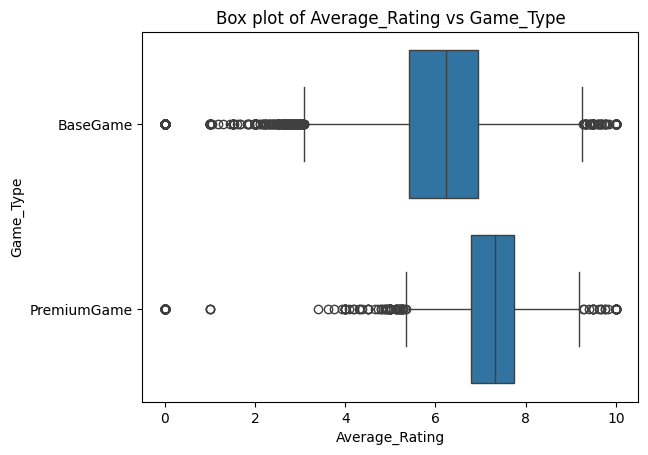

In [ ]:
sns.boxplot(data=records, x='Average_Rating', y='Game_Type')
plt.title('Box plot of Average_Rating vs Game_Type')

Text(0.5, 1.0, 'Box plot of Average_Rating vs Age_Category')

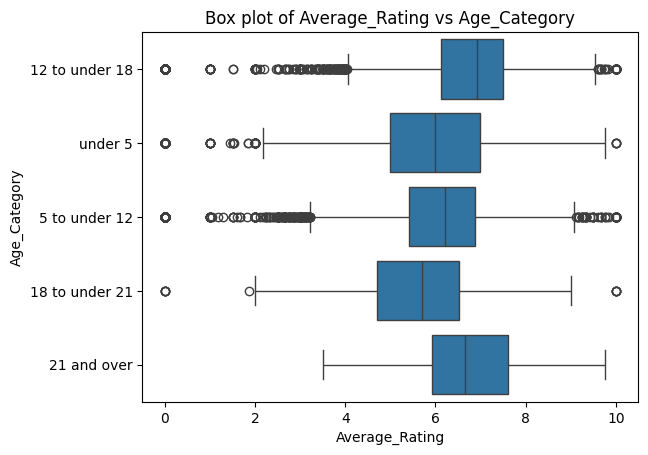

In [ ]:
sns.boxplot(data=records, x='Average_Rating', y='Age_Category')
plt.title('Box plot of Average_Rating vs Age_Category')

# Relationship between Average_Rating and numerical variables


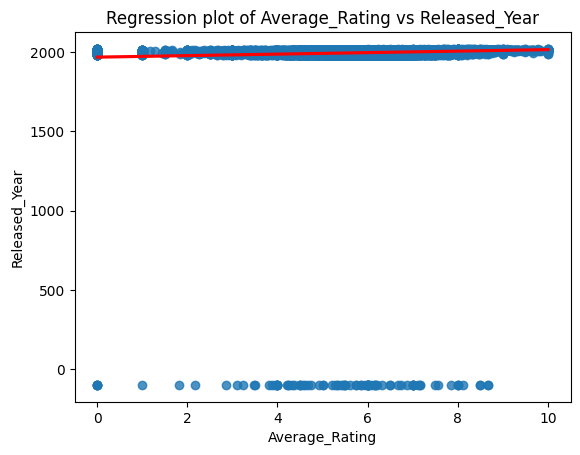

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Released_Year', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Released_Year')
plt.show()

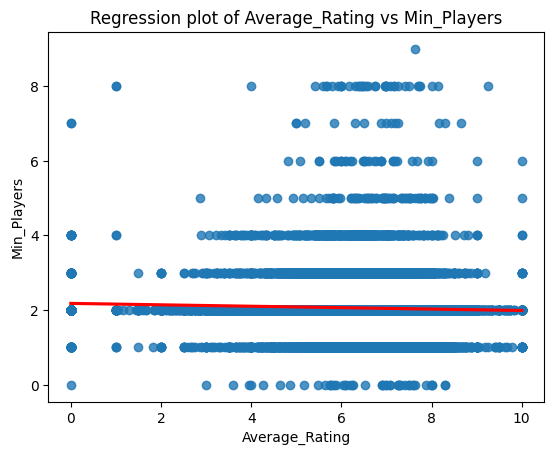

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Min_Players', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Min_Players')
plt.show()

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Max_Players')

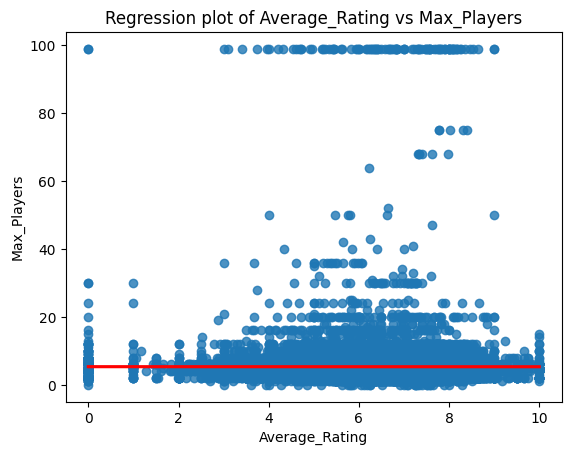

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Max_Players', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Max_Players')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Average_Complexity')

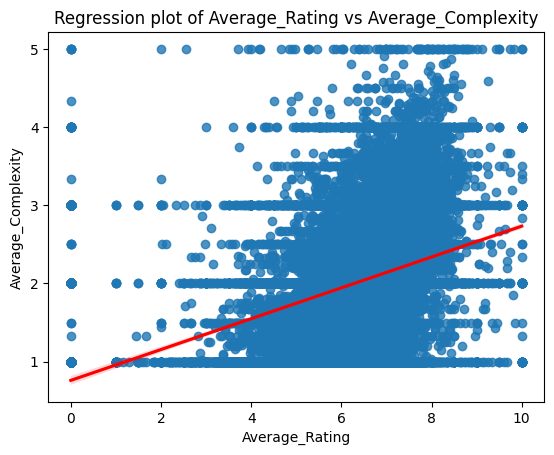

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Average_Complexity', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Average_Complexity')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Complexity_Raters')

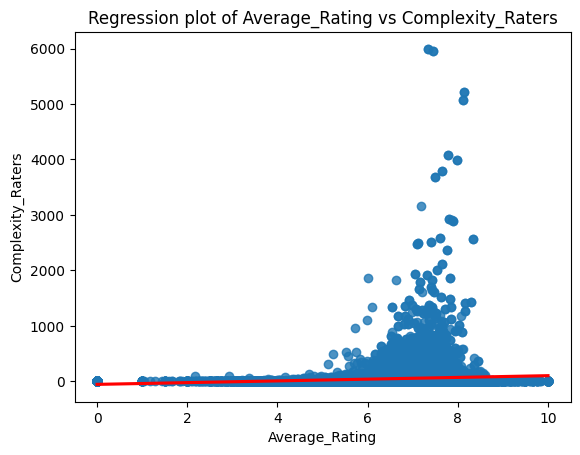

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Complexity_Raters', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Complexity_Raters')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Average_Play_Time')

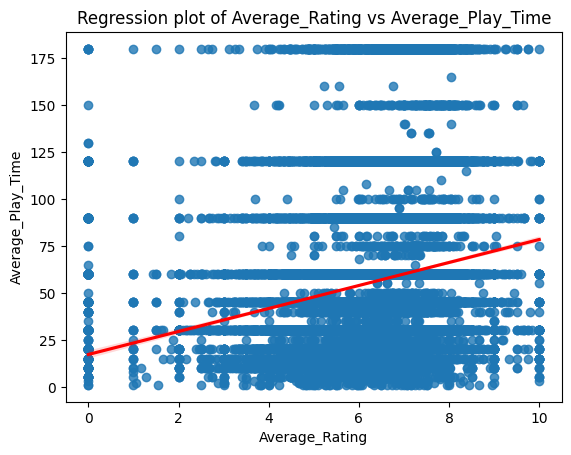

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Average_Play_Time', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Average_Play_Time')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Owner_Number')

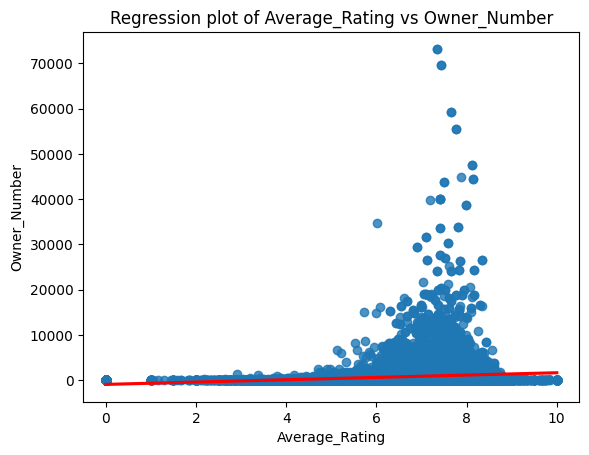

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Owner_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Owner_Number')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Trader_Number')

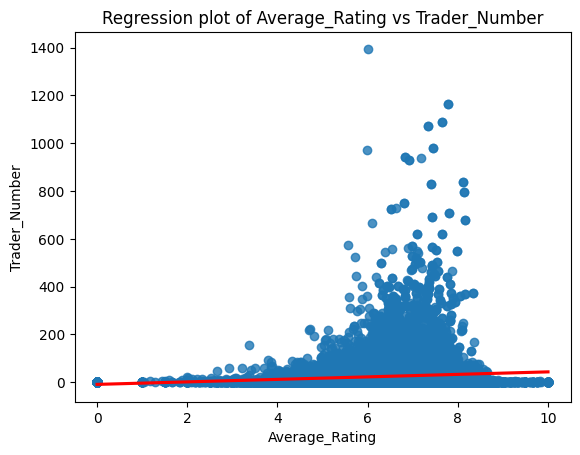

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Trader_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Trader_Number')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs HighInterest_Number')

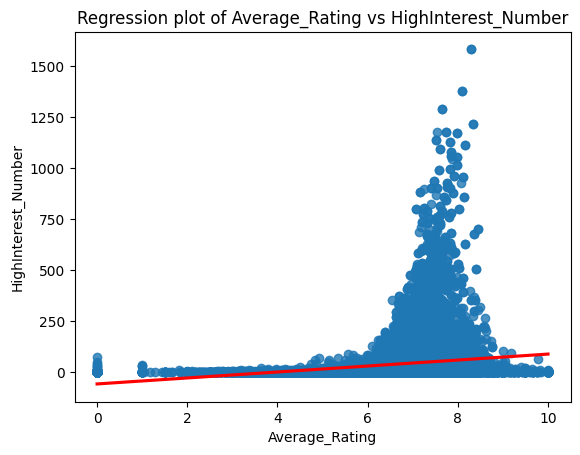

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='HighInterest_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs HighInterest_Number')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Interest_Number')

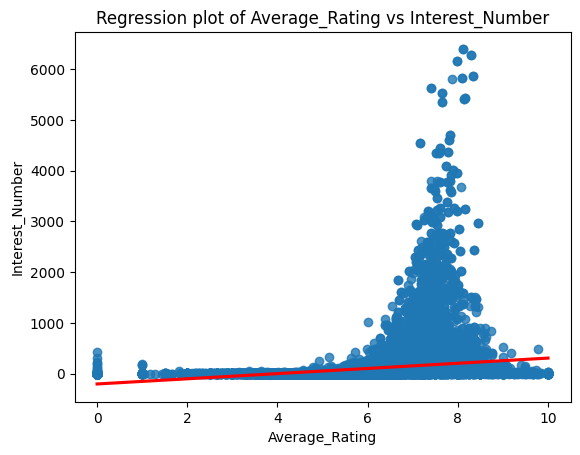

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Interest_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Interest_Number')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Rater_Number')

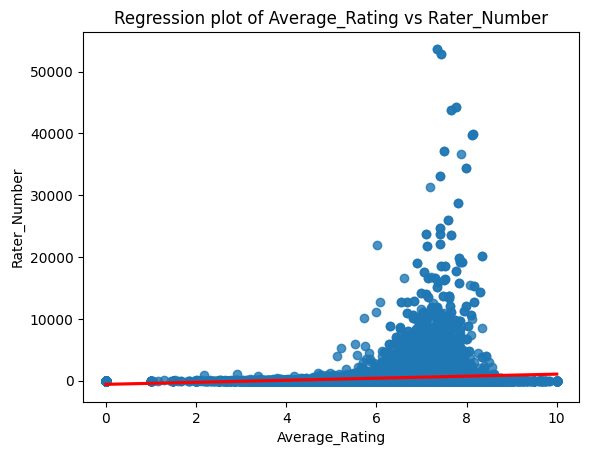

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Rater_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Rater_Number')

Text(0.5, 1.0, 'Regression plot of Average_Rating vs Comment_Number')

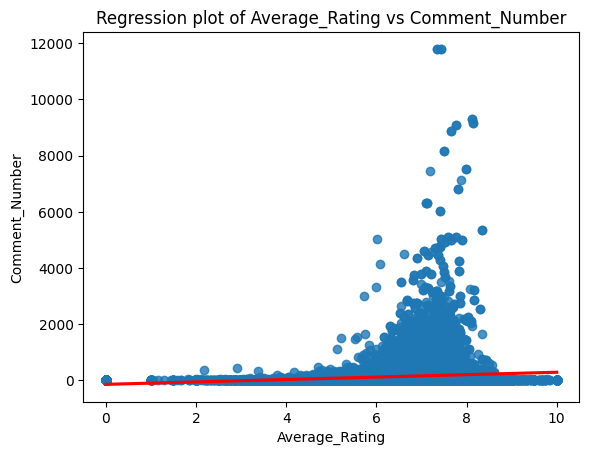

In [ ]:
sns.regplot(data=records, x='Average_Rating', y='Comment_Number', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Rating vs Comment_Number')

Text(0.5, 1.0, 'Regression plot of Average_Complexity vs Average_Play_Time')

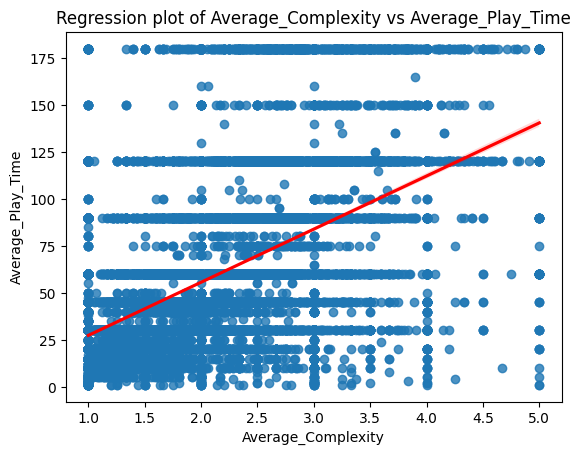

In [ ]:
sns.regplot(data=records, x='Average_Complexity', y='Average_Play_Time', line_kws={'color': 'red'})
plt.title('Regression plot of Average_Complexity vs Average_Play_Time')

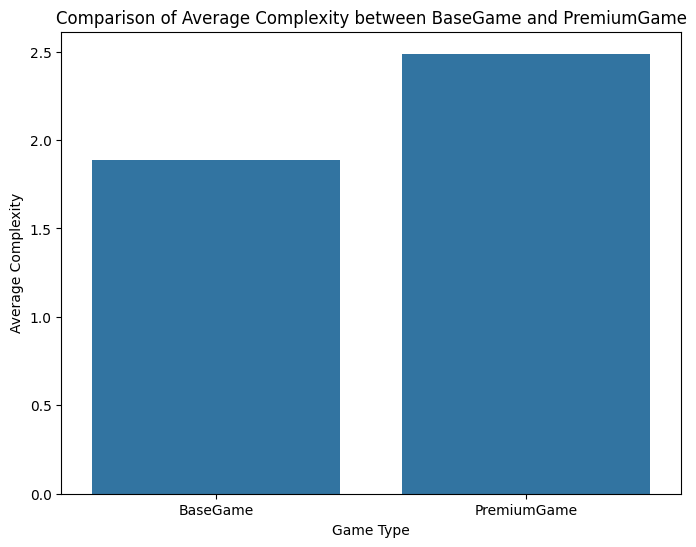

In [ ]:
base_games = records[records['Game_Type'] == 'BaseGame']
premium_games = records[records['Game_Type'] == 'PremiumGame']

# Calculate average complexity
avg_complexity_base = base_games['Average_Complexity'].mean()
avg_complexity_premium = premium_games['Average_Complexity'].mean()

# Create a DataFrame for easy plotting
complexity_data = pd.DataFrame({
    'Game_Type': ['BaseGame', 'PremiumGame'],
    'Average_Complexity': [avg_complexity_base, avg_complexity_premium]
})

# Plotting the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Game_Type', y='Average_Complexity', data=complexity_data)
plt.title('Comparison of Average Complexity between BaseGame and PremiumGame')
plt.xlabel('Game Type')
plt.ylabel('Average Complexity')
plt.show()

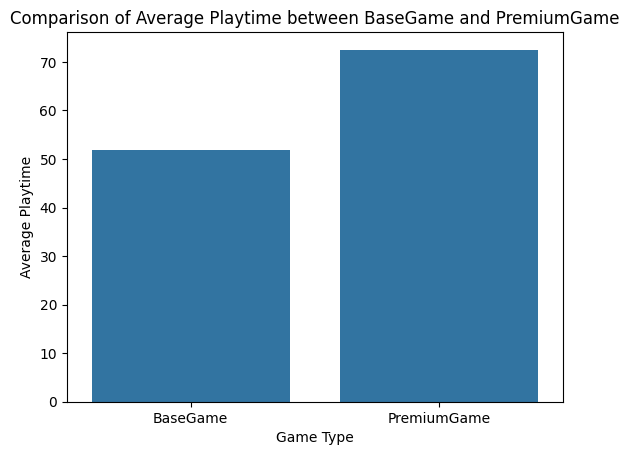

In [ ]:
avg_playtime_base = records[records['Game_Type'] == 'BaseGame']['Average_Play_Time'].mean()
avg_playtime_premium = records[records['Game_Type'] == 'PremiumGame']['Average_Play_Time'].mean()

playtime_data = pd.DataFrame({
    'Game_Type': ['BaseGame', 'PremiumGame'],
    'Average_Playtime': [avg_playtime_base, avg_playtime_premium]
})
sns.barplot(x='Game_Type', y='Average_Playtime', data=playtime_data)
plt.title('Comparison of Average Playtime between BaseGame and PremiumGame')
plt.xlabel('Game Type')
plt.ylabel('Average Playtime')
plt.show()


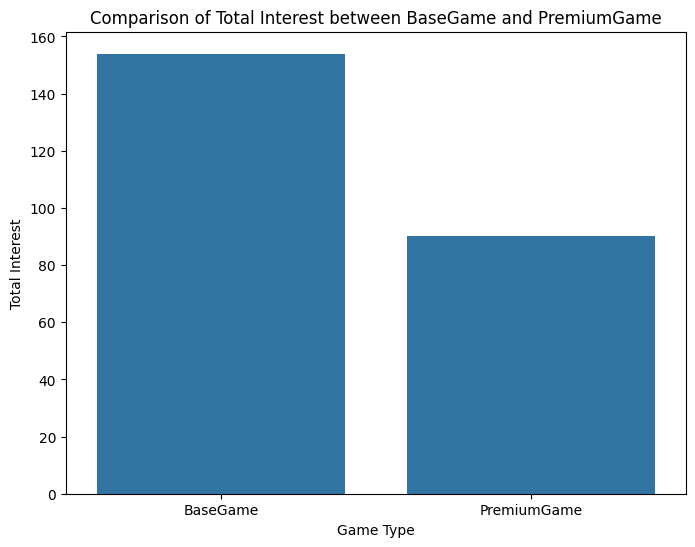

In [ ]:
base_interest = records[records['Game_Type'] == 'BaseGame'][['Interest_Number', 'HighInterest_Number']].sum(axis=1).mean()
premium_interest = records[records['Game_Type'] == 'PremiumGame'][['Interest_Number', 'HighInterest_Number']].sum(axis=1).mean()

# Create a DataFrame for plotting
interest_data = pd.DataFrame({
    'Game_Type': ['BaseGame', 'PremiumGame'],
    'Total_Interest': [base_interest, premium_interest]
})

# Plotting the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Game_Type', y='Total_Interest', data=interest_data)
plt.title('Comparison of Total Interest between BaseGame and PremiumGame')
plt.xlabel('Game Type')
plt.ylabel('Total Interest')
plt.show()

In [ ]:
#define my own array of numeric variables of interest
numerical_variables  = ['Released_Year', 'GameType_N', 'Age_Category_N', 'Min_Players', 'Max_Players', 'Average_Complexity', 'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number', 'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number', 'Average_Rating']

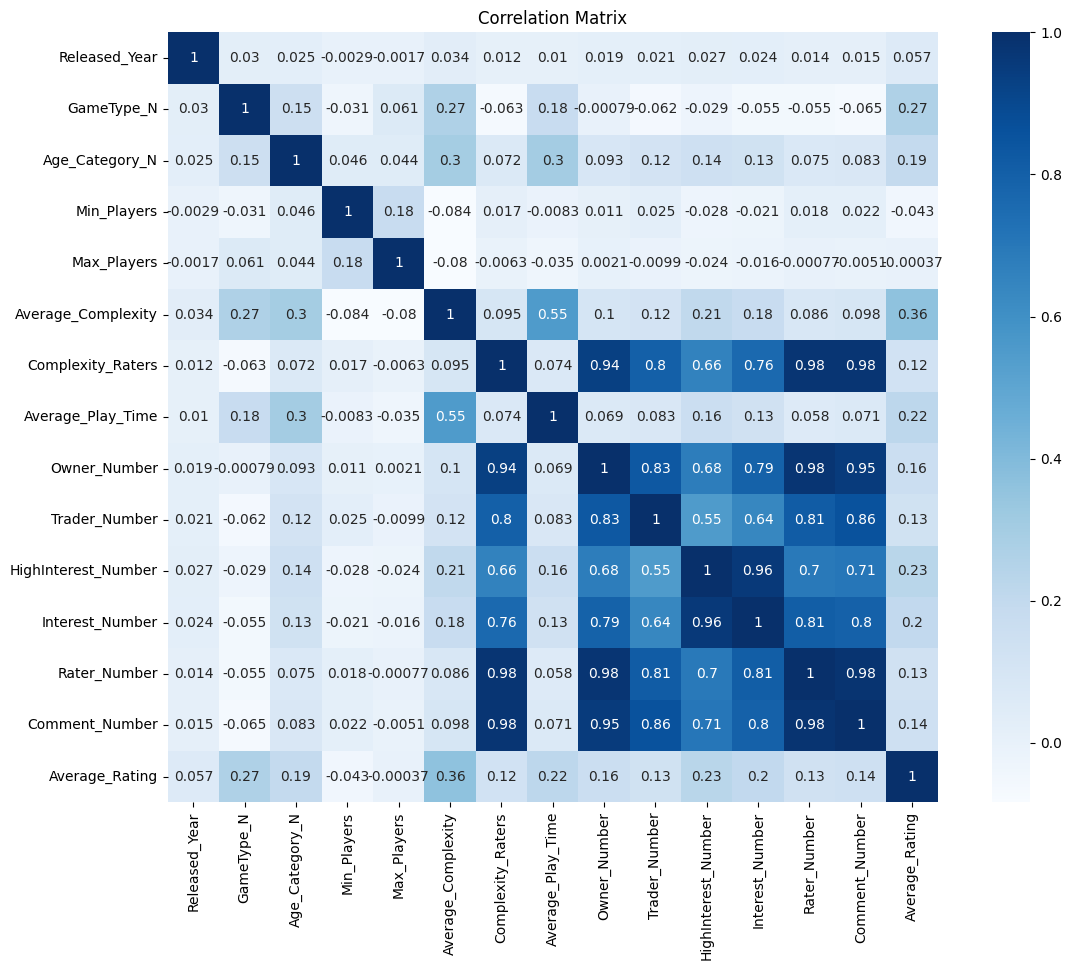

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True)
plt.title("Correlation Matrix")
plt.show()

## **1.8 Select features and target**

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average_Rating       24813 non-null  float64
 1   Released_Year        24813 non-null  int64  
 2   Game_Type            24813 non-null  object 
 3   Age_Category         24813 non-null  object 
 4   Min_Players          24813 non-null  int64  
 5   Max_Players          24813 non-null  int64  
 6   Average_Complexity   24813 non-null  float64
 7   Complexity_Raters    24813 non-null  int64  
 8   Average_Play_Time    24813 non-null  int64  
 9   Owner_Number         24813 non-null  int64  
 10  Trader_Number        24813 non-null  int64  
 11  HighInterest_Number  24813 non-null  int64  
 12  Interest_Number      24813 non-null  int64  
 13  Rater_Number         24813 non-null  int64  
 14  Comment_Number       24813 non-null  int64  
 15  GameType_N           24813 non-null 

In [ ]:
features=['GameType_N','Average_Complexity', 'Average_Play_Time', 'HighInterest_Number', 'Interest_Number']
X=records[features]

In [ ]:
y=records['Average_Rating']
y.head()

,Average_Rating
0,8
1,8
2,6
3,8
4,8


In [ ]:
X.shape

(24813, 5)

In [ ]:
y.shape

(24813,)

## **1.9 Split the dataset**


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
#import linear_model
from sklearn import linear_model

In [ ]:
##write your code to split dataset into training set 80% and test set 20%, see how we did it in SECTION 1.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


       GameType_N  Average_Complexity  Average_Play_Time  HighInterest_Number  \
3337            0                   2                 30                    0   
4422            0                   1                 30                    0   
7883            0                   1                 60                    0   
19274           0                   1                 20                    9   
19486           0                   2                 20                   23   

       Interest_Number  
3337                 3  
4422                 0  
7883                 1  
19274               32  
19486               31  
3337    5
4422    6
7883    6
19274   6
19486   7
Name: Average_Rating, dtype: float64
Training dataset size: (19850, 5)
Test dataset size: (4963, 5)


## **1.10 A Linear Regression Model**

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

### **1.10.1 Train a model**

In [ ]:
reg=reg.fit(X_train, y_train)

### **1.10.2 Make predictions using the model and the test set**

In [ ]:
y_pred = reg.predict(X_test)

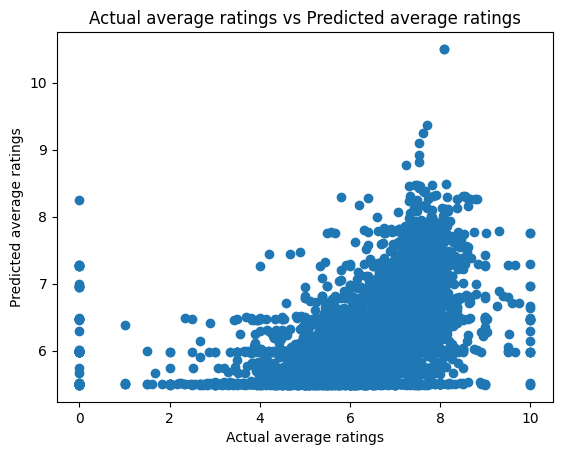

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual average ratings")
plt.ylabel("Predicted average ratings")
plt.title("Actual average ratings vs Predicted average ratings")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['Average_Complexity']
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection=pd.DataFrame({'Average_Complexity':Average_Complexity, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,Average_Complexity,Actual,Predicted
20340,1,5,6
9935,2,6,6
21357,2,6,6
5352,2,5,6
746,2,0,6
15237,2,7,7
12920,4,8,8
11883,3,7,7
3300,3,5,6
23969,1,7,6


In [ ]:
import pandas as pd

inspection = pd.DataFrame({
    'Game_Type': X_test['GameType_N'],
    'Average_Complexity': X_test['Average_Complexity'],
    'Average_Play_Time': X_test['Average_Play_Time'],
    'HighInterest_Number': X_test['HighInterest_Number'],
    'Interest_Number': X_test['Interest_Number'],
    'Actual': y_test,
    'Predicted': y_pred
})

inspection.head(20)

,Game_Type,Average_Complexity,Average_Play_Time,HighInterest_Number,Interest_Number,Actual,Predicted
20340,0,1,20,3,7,5,6
9935,0,2,20,0,4,6,6
21357,0,2,45,2,4,6,6
5352,0,2,90,0,0,5,6
746,0,2,15,0,1,0,6
15237,0,2,45,390,896,7,7
12920,1,4,120,8,20,8,8
11883,0,3,90,59,343,7,7
3300,0,3,10,3,5,5,6
23969,1,1,30,1,2,7,6


### **1.10.3 Performance evaluation**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.21


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 1


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1


In [ ]:
#Examine the performance using the descriptive stats
inspection['Actual'].describe()

,Actual
count,4963
mean,6
std,1
min,0
25%,6
50%,6
75%,7
max,10


In [ ]:
#Examine the descriptive stats of predicted average rating
inspection['Predicted'].describe()

,Predicted
count,4963
mean,6
std,1
min,5
25%,6
50%,6
75%,7
max,11


In [ ]:
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

GameType_N: 0.80
Average_Complexity: 0.48
Average_Play_Time: 0.00
HighInterest_Number: 0.00
Interest_Number: -0.00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

In [ ]:
# Add intercept for VIF calculation
X_vif = X.copy()
X_vif['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["variables"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs to two decimal places
for index, row in vif_data.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')

GameType_N: 1.09
Average_Complexity: 1.53
Average_Play_Time: 1.44
HighInterest_Number: 12.78
Interest_Number: 12.67
intercept: 6.86


In [ ]:
# prompt: calculate 95CI for the y_pred, upper and lower bound

import numpy as np
from scipy import stats

# Calculate the standard error of the prediction
std_error = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate the critical value for a 95% confidence interval
z_critical = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the upper and lower bounds of the confidence interval
upper_bound = y_pred + z_critical * std_error
lower_bound = y_pred - z_critical * std_error

#print("95% Confidence Interval:")
# Iterate through the confidence intervals and print each one
#for i in range(len(upper_bound)):
#    print(f"Prediction {i+1}:")
#    print(f"  Upper Bound: {upper_bound[i]:.2f}")
#    print(f"  Lower Bound: {lower_bound[i]:.2f}")

In [ ]:
# prompt: add upper_bound[i]:.2f and lower_bound[i]:.2f} to inspection

inspection['upper_bound'] = upper_bound
inspection['lower_bound'] = lower_bound

inspection.head(20)


,Average_Complexity,Actual,Predicted,upper_bound,lower_bound
20340,1,5,6,8,3
9935,2,6,6,8,3
21357,2,6,6,8,3
5352,2,5,6,9,3
746,2,0,6,9,3
15237,2,7,7,10,5
12920,4,8,8,10,5
11883,3,7,7,9,4
3300,3,5,6,9,4
23969,1,7,6,9,4
